## Exam of Numerical methods, 16 February 2024

### Exercise 1

Implement the following:

1. Using the inverse transform method, write your own code to sample $10^5$ values of a random variable distributed according to $p(x) = a e^{-ax}$, with $a=0.6$.
2. Plot the histogram of the values you have just sampled and overplot the $p(x)$ distribution (to verify that your code is correctly working).
3. Consider the integral $I = \int_0^{\pi} dx \frac{1}{x^2 + \cos^2(x)}$. Plot the integrand. Overplot the function $e^{-ax}$
4. Use importance sampling with weight $w(x) = e^{-ax}$ to solve the integral $I = \int_0^{\pi} dx \frac{1}{x^2 + \cos^2(x)}$. Take a sample with size $N=10^5$.
5. Now solve the same integral using Simpson's integration and check that the two results are consistent.  

In [2]:
import numpy as np
import secrets # Serve solo quando vuoi generare numeri casuali sicuri, cioè non prevedibili.
import matplotlib.pyplot as plt
from scipy import integrate

#### Sampling variables ~ $p(x)$ and plotting the histogram

By computing the CDF we find that, after sampling uniformly distributed $y$, we have to apply the transform $x = (-1/a) \log(y)$ 

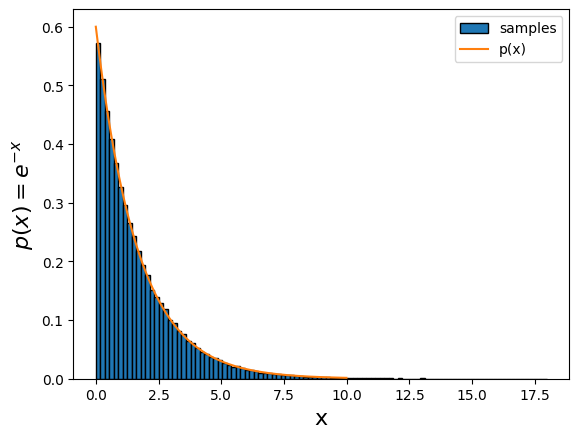

In [3]:
a = 0.6

seed = secrets.randbits(128) #Questo numero viene usato come seme (seed) del generatore pseudocasuale di NumPy.
rng = np.random.default_rng(seed) #Crei un generatore di numeri casuali moderno di NumPy (Generator) inizializzato con il seed appena creato.
N = 100000
y = rng.random(N) #Generi N numeri casuali uniformi in [0,1).
x = (1./a)*np.array(-np.log(y))

# Plotting histogram of sampled values and checking that they are distributed as p(x)
plt.hist(x, bins=100, density=True, ec = 'black', histtype='bar',label='samples')  
#l’area totale dell’istogramma viene normalizzata a 1, quindi l’istogramma rappresenta una stima della densità di probabilità.
#ec='black': “edge color”, colore del bordo delle barre (nero).
#histtype='bar': tipo di istogramma a barre
#label='samples': etichetta per la legenda (“samples”).

xlist = np.arange(0,10,0.01)
px = a*np.exp(-a*xlist)
plt.plot(xlist,px, label='p(x)')
plt.xlabel('x',size=16)
plt.ylabel(r'$p(x)=e^{-x}$',size = 16)
plt.legend()
plt.show()

#### Plotting the integrand

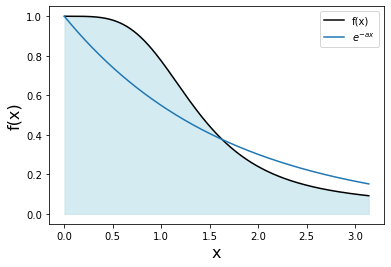

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.6   # definisci il parametro a

def f(x):
    return 1/(x**2 + np.cos(x)**2)

x = np.arange(0.001, np.pi, 0.0001)
y = f(x)
z = np.exp(-a * x)

plt.plot(x, y, color='black', label='f(x)')
plt.plot(x, z, label=r'$e^{-ax}$')
plt.fill_between(x, y, color='lightblue', alpha=0.5)
plt.xlabel('x', size=16)
plt.ylabel('f(x)', size=16)
plt.legend()
plt.show()


#### Importance sampling with $w(x) = e^{-ax}$, $\large I = \frac{1}{N} \sum \frac{f(x_i)}{w(x_i)} \int_a^b w(x)dx$ 

In [6]:


import numpy as np

a = 0.6

def f(x):
    return 1.0 / (x**2 + np.cos(x)**2)

N = 100000

# Generatore RNG (se non l'hai già definito)
rng = np.random.default_rng(123)

# Campionamento da U(0,1)
u = rng.random(N)

# Trasformata inversa della esponenziale TRONCATA in [0, pi]
x = -(1.0/a) * np.log(1.0 - u * (1.0 - np.exp(-a*np.pi)))

# Peso w(x) = e^{-a x}
w = np.exp(-a*x)

# f(x_i)
fx = f(x)

# Normalizzazione: ∫_0^π e^{-a x} dx
normalization = (1.0 - np.exp(-a*np.pi)) / a

# Formula di importance sampling
I = (normalization / float(N)) * np.sum(fx / w)

print('I =', I)


I = 1.5825426260923743


#### Same integral by Simpson's rule

In [11]:
import numpy as np
from scipy import integrate

def f(x):
    return 1.0/(x**2 + np.cos(x)**2)

dx = 0.01
x = np.arange(0, np.pi, dx)
fx = f(x)

# Usa simps invece di simpson
I = integrate.simps(fx, x)

print('I =', I)


I = 1.5810413797509315


### Exercise 2

Three point particles, A,B,C, are initially positioned in the vertices of an equilateral triangle with side length $l = 3$ [hence you can assign initial coordinates $A = (0,0)$, $B = (3,0)$, $C = (1.5,\frac{3\sqrt{3}}{2}$)]. From this configuration, the particles start moving in such a way that, at each instant in time: 
- the velocity of particle $A$ points towards $B$
- the velocity of particle $B$ points towards $C$
- the velocity of particle $C$ points towards $A$
- The modulus of each velocity stays always constant and equal to $v = 2$.

1. Write a function that computes the components $v_x$ and $v_y$, at any given time, as a function of the positions of a pair of particles and of the modulus of the velocity (pointing from one partcicle to the other)
2. Integrate the equation of motions for the three particle system, with intial time $t_0 = 0$ and final time $t_1 = 1$; take a step $\Delta t = 0.01$.
3. Make a plot of the three trajectories (you should see that they meet at $t_1=1$, in the baricenter of the triangle).

In [19]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#### Velocity components

In [42]:
def v_components(v,P1,P2):
    # Component x of the vector connecting the two particles
    dx = P2[0] - P1[0] 
    # Component y of the vector connecting the two particles
    dy = P2[1] - P1[1]
    # Length of the vector connecting the two particles
    l = np.sqrt(dx**2 + dy**2)
    # Cosine and sine of the angle formed between the vector and the x-axis
    cos12 = dx/l
    sin12 = dy/l
    # Velocity components
    vx = v*cos12
    vy = v*sin12
    return np.array([vx,vy])

#### Solving simple ODE to get trajectories. 

If $\mathbf{x}$ is the position vector of a given particle at time $t$, we just have to integrate $d \mathbf{x}/dt = \mathbf{v}(\mathbf{x})$. We get a system of six equations (for each particle, one equation per component). 

In [44]:
def f(x,t):
    # Derivatives
    v = 2.
    A = x[0:2]
    B = x[2:4]
    C = x[4:6]
    vAB = v_components(v,A,B)
    vBC = v_components(v,B,C)
    vCA = v_components(v,C,A)
    v = np.concatenate( (vAB,vBC,vCA) )
    return v

# Time steps
t = np.arange(0.,1.01,0.01)
#Initial positions
A0 = np.array([0.,0.])
B0 = np.array([3.,0.])
C0 = np.array([1.5,1.5*np.sqrt(3.)])
x0 = np.concatenate( (A0,B0,C0) )

# Solving with scipy ODEint
sol = integrate.odeint(f, x0, t)

#### Plotting trajectories

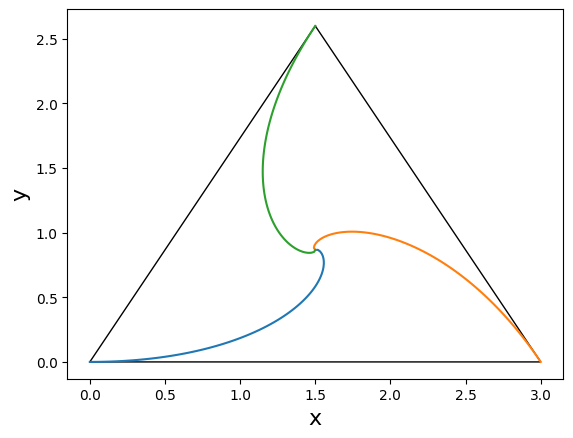

In [45]:
fig,ax = plt.subplots()
ax.plot(sol[:,0],sol[:,1])
ax.plot(sol[:,2],sol[:,3])
ax.plot(sol[:,4],sol[:,5])
triangle = plt.Polygon( [(0,0),(3,0), (1.5,1.5*np.sqrt(3.))],ec='black',fc='None' )
ax.add_patch(triangle)
plt.xlabel('x',size=16)
plt.ylabel('y',size=16)
plt.show()